<a href="https://colab.research.google.com/github/mariola5/German_Credit_Risk/blob/main/German_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

German Credit Risk

##Import Bibliotek

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#Import danych

In [55]:
german_df = pd.read_csv("/content/german_credit_data.csv")

In [56]:
german_df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good


In [57]:
german_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [58]:
german_df.columns = german_df.columns.str.replace(" ", "_") 

In [59]:
german_df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving_accounts       4
Checking_account      3
Credit_amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

#Prezentacja danych na wykresach
W tym zbiorze danych każdy wpis reprezentuje osobę, która bierze kredyt w banku. Każda osoba podlega klasyfikacji na dobre lub złe ryzyko kredytowe zgodnie z zestawem atrybutów.

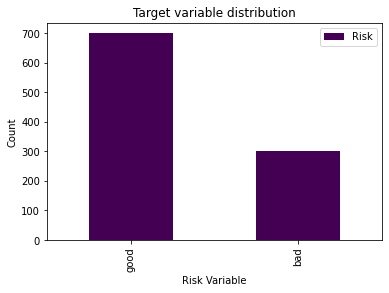

In [60]:
german_df['Risk'].value_counts().plot(kind='bar', title="Target variable distribution", xlabel="Risk Variable", ylabel="Count", legend=True, cmap='viridis')

Poniżej na 4 wykresach ryzyko ze względu na wiek, poziom wykształcenia, czas trwania (w miesiącach) oraz przeznaczenie kredytu.

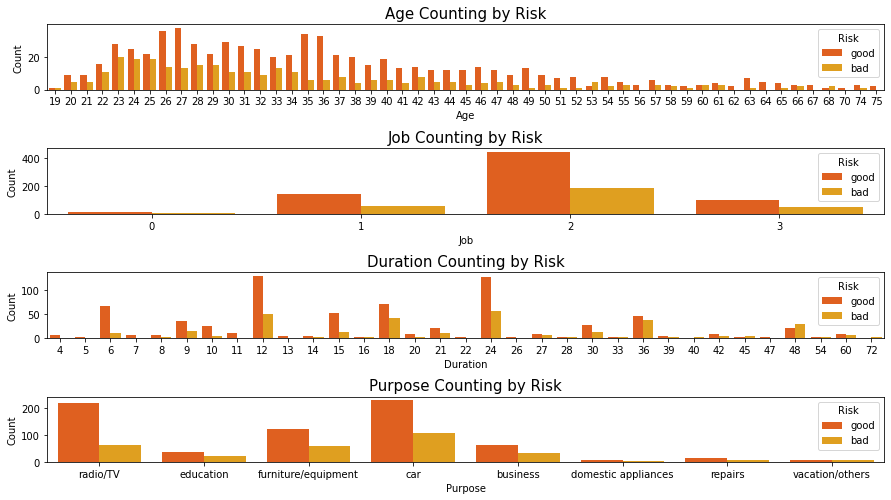

In [61]:
fig, ax = plt.subplots(nrows=4, figsize=(15,9))
plt.subplots_adjust(hspace = 0.9, top = 0.8)

g1 = sns.countplot(x="Age",data=german_df, 
              palette="autumn", ax=ax[0], 
              hue = "Risk")
g1.set_title("Age Counting by Risk", fontsize=15)
g1.set_xlabel("Age")
g1.set_ylabel("Count")

g2 = sns.countplot(x="Job",data=german_df, 
              palette="autumn", ax=ax[1], 
              hue = "Risk")
g2.set_title("Job Counting by Risk", fontsize=15)
g2.set_xlabel("Job")
g2.set_ylabel("Count")

g3 = sns.countplot(x="Duration",data=german_df, 
              palette="autumn", ax=ax[2], 
              hue = "Risk")
g3.set_title("Duration Counting by Risk", fontsize=15)
g3.set_xlabel("Duration")
g3.set_ylabel("Count")

g4 = sns.countplot(x="Purpose",data=german_df, 
              palette="autumn", ax=ax[3], 
              hue = "Risk")
g4.set_title("Purpose Counting by Risk", fontsize=15)
g4.set_xlabel("Purpose")
g4.set_ylabel("Count")

plt.show()

#Liczba udzielonych kredytów ze względu na przeznaczenie

In [62]:
n_credits = german_df.groupby("Purpose")["Purpose"].count().rename("Count").reset_index()
print(n_credits)

               Purpose  Count
0             business     97
1                  car    337
2  domestic appliances     12
3            education     59
4  furniture/equipment    181
5             radio/TV    280
6              repairs     22
7      vacation/others     12


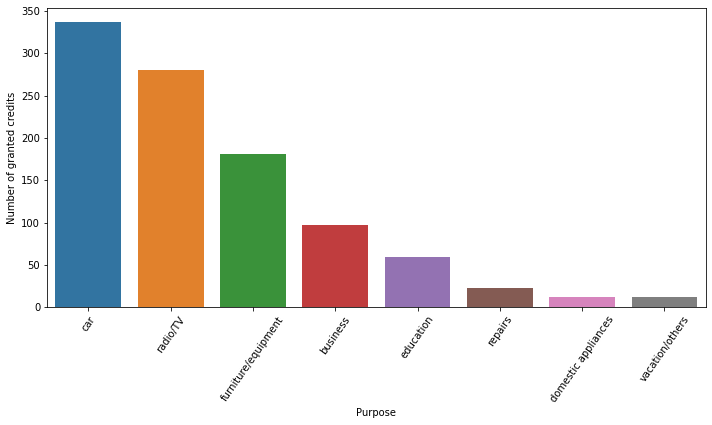

In [63]:
n_credits = german_df.groupby("Purpose")["Purpose"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=55)
plt.ylabel("Number of granted credits")
plt.tight_layout()

Wniosek: Większość kredytów została przyznana na samochód i radio/telewizję.

#Uzupełnienie brakujących wartości

In [64]:
german_df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [65]:
german_df[['Saving_accounts', 'Checking_account']]

,Saving_accounts,Checking_account
0,NaN,little
1,little,moderate
2,little,NaN
3,little,little
4,little,little
...,...,...
995,little,NaN
996,little,little
997,little,NaN
998,little,little


In [66]:
for col in ['Saving_accounts', 'Checking_account']:
    german_df[col].fillna('none', inplace=True)

In [67]:
german_df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving_accounts     0
Checking_account    0
Credit_amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

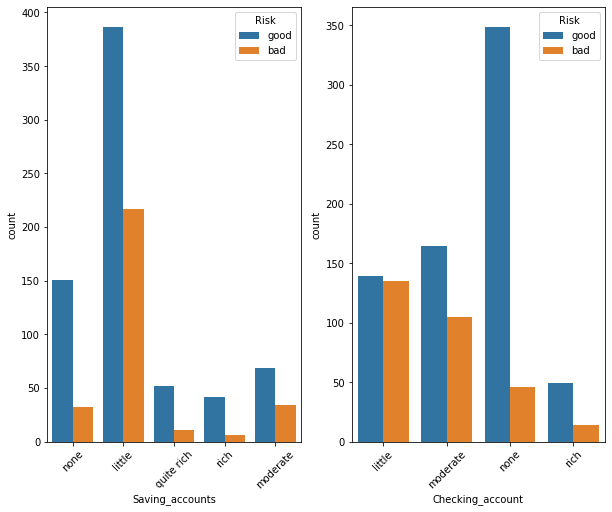

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
sns.countplot(x="Saving_accounts", hue="Risk", data=german_df, ax=ax1)
sns.countplot(x="Checking_account", hue="Risk", data=german_df, ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


fig.show()

Wnioski: Im osoba bogatsza, tym większa szansa na sklasyfikowanie jako dobre ryzyko. Natomiast zdumiewające jest to, że brak informacji o poziomie zamożności w kolumnie Checking_account większości przypadków klasyfikuje jako dobre ryzyko.
W kolumnie Checking_account osoby mające mało pieniędzy mają równy rozkład ryzyka. Natomiast w kolumnie Saving_accounts, więcej osób zostaje sklasyfikowana jako dobre ryzyko. Ma to sens, ponieważ samo istnienie konta oszczędnościowego wiąże się z pewnym stopniem bezpieczeństwa finansowego.